# Medical Student Mental Health and Wellbeing
### The objective of this dataset is to gain insight into the wellbeing of medical students in order to promote better policies by understanding relationships between these variables.

#### Author : Fares Sayadi

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-student-mental-health/Codebook Carrard et al. 2022 MedTeach.csv
/kaggle/input/medical-student-mental-health/Data Carrard et al. 2022 MedTeach.csv


In [2]:
# Load the data and store it in a pandas dataframe
df = pd.read_csv('/kaggle/input/medical-student-mental-health/Data Carrard et al. 2022 MedTeach.csv')

In [3]:
# Check the first 10 rows of the data
df.head(10)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
5,14,26,5,2,1,1,1,10,2,0,102,48,37,17,0.690476,14,56,18,15,18
6,17,23,5,2,1,1,0,15,3,0,117,58,38,23,0.714286,45,56,28,17,16
7,21,23,4,1,1,1,1,8,4,0,118,65,40,32,0.880952,6,36,11,10,27
8,23,23,4,2,1,1,1,20,2,0,118,69,46,23,0.666667,43,43,26,21,22
9,24,22,2,2,1,1,0,20,5,0,108,56,36,22,0.690476,11,43,18,6,23


## Data Cleaning and Preprocessing (DCP)

In [4]:
# what columns do we have?
print(df.columns)
# what are the data types of the columns?
print(df.shape)

Index(['id', 'age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')
(886, 20)


In [5]:
# drop column 'id' as it is not relevant to the research question
df = df.drop('id', axis=1)

In [6]:
# check for missing values and remove them if necessary (NaN)
df.isnull().sum()

age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [7]:
# check for duplicates and remove them if necessary
df.duplicated().sum()

0

We separate the data into two groups: categorical and numerical. We will use different methods to describe and visualize the data in each group.

In [8]:
# Separate the data into two groups: categorical and numerical
df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

## Categorical Data

### Description and simple visualization

In [9]:
df_cat.head(10)

,sex,year,glang,part,job,stud_h,health,psyt
0,1,1,120,1,0,56,3,0
1,1,4,1,1,0,20,4,0
2,2,3,1,0,0,36,3,0
3,2,2,1,0,1,51,5,0
4,1,3,1,1,0,22,4,0
5,2,5,1,1,1,10,2,0
6,2,5,1,1,0,15,3,0
7,1,4,1,1,1,8,4,0
8,2,4,1,1,1,20,2,0
9,2,2,1,1,0,20,5,0


In [10]:
# Naive description of the categorical data
df_cat.describe(include='all')

,sex,year,glang,part,job,stud_h,health,psyt
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1.695260,3.102709,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605
std,0.472665,1.763937,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000
75%,2.000000,5.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000
max,3.000000,6.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000


In [11]:
# Count and percentage of each category for each feature
for col in df_cat.columns:
    print(col) # print the name of the column
    print(pd.crosstab(index=df_cat[col], columns='count')) # print the count of each category
    print(pd.crosstab(index=df_cat[col], columns='percentage', normalize=True)) # print the percentage of each category
    print('-----------------')

sex
col_0  count
sex         
1        275
2        606
3          5
col_0  percentage
sex              
1        0.310384
2        0.683973
3        0.005643
-----------------
year
col_0  count
year        
1        245
2        135
3        143
4        123
5        127
6        113
col_0  percentage
year             
1        0.276524
2        0.152370
3        0.161400
4        0.138826
5        0.143341
6        0.127540
-----------------
glang
col_0  count
glang       
1        717
15        31
20        22
37         3
54         1
60         3
63         5
90        45
92         1
95         1
98         1
102       27
104        4
106        6
108        1
114        1
118        2
120        2
121       13
col_0  percentage
glang            
1        0.809255
15       0.034989
20       0.024831
37       0.003386
54       0.001129
60       0.003386
63       0.005643
90       0.050790
92       0.001129
95       0.001129
98       0.001129
102      0.030474
104      0.004515
106

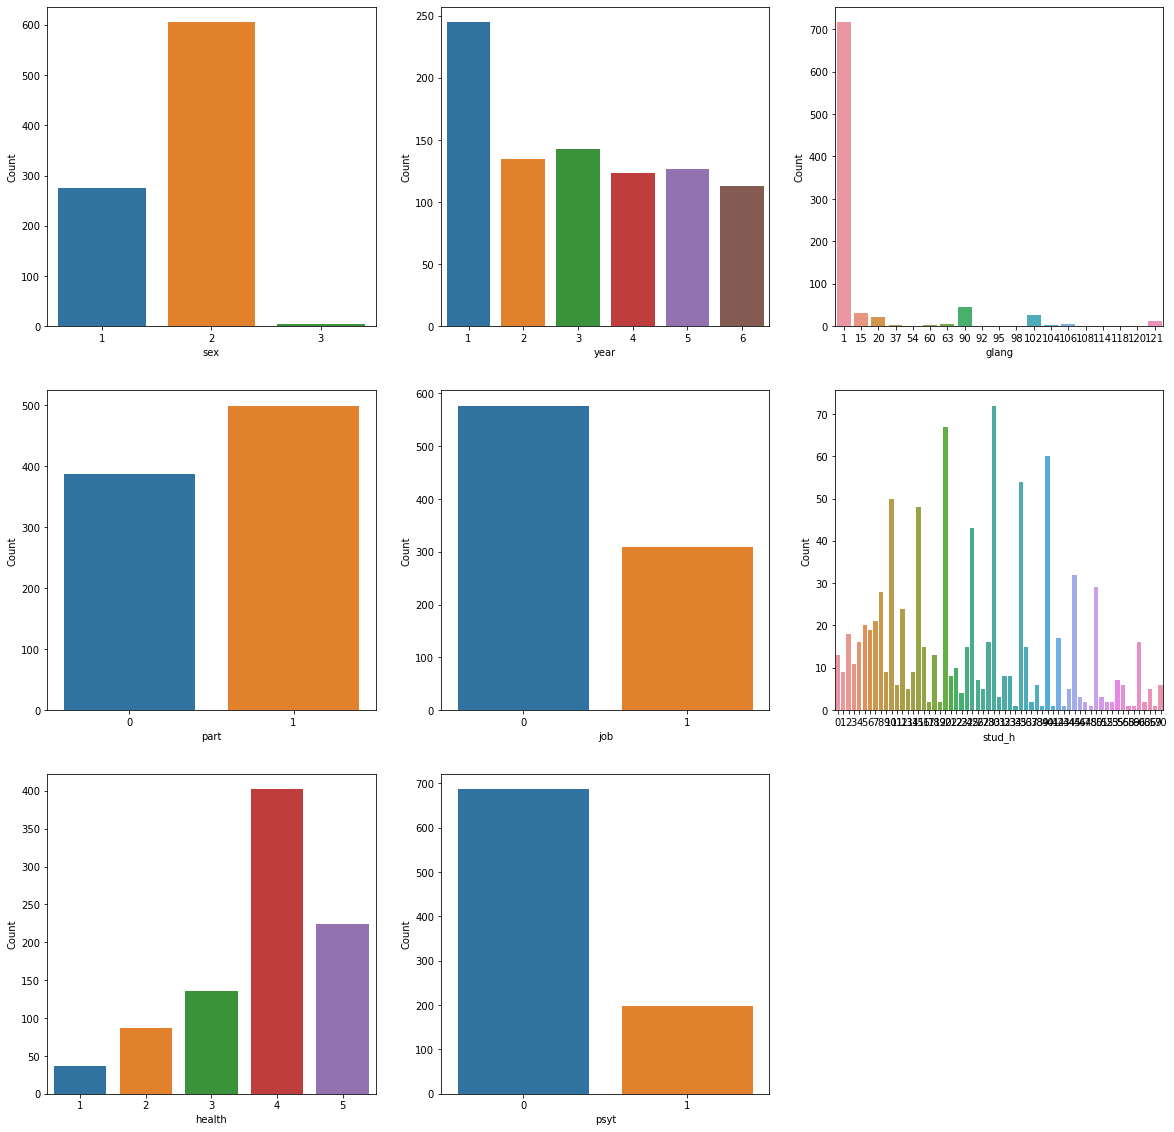

In [12]:
# Plotting the count of each category for each feature using Seaborn

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the count of each category for each feature
for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df_cat)
    plt.xlabel(col)
    plt.ylabel('Count')

### Finding relationships between categorical variables using Chi-Square Test of Independence

Finding relationships between 2 categorical variables : Chi-Square Test of Independence
1. Null hypothesis: There is no relationship between the two variables
2. Alternative hypothesis: There is a relationship between the two variables
3. If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between the two variables

In [13]:
# Chi-Square Test of Independence for each pair of categorical variables in a new dataframe
from scipy.stats import chi2_contingency
chi2_table = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
for i, col1 in enumerate(df_cat.columns):
    for j, col2 in enumerate(df_cat.columns):
        if i < j:
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_cat[col1], df_cat[col2]))
            chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)

In [14]:
# Keep only the pairs of variables that are related (p-value < 0.05) and sort them by p-value in ascending order (the smaller the p-value, the stronger the relationship)
chi2_table = chi2_table[chi2_table['p-value'] < 0.05].sort_values(by='p-value')
chi2_table

,Variable 1,Variable 2,Chi-Square,p-value
10,year,stud_h,608.992141,3.320205e-23
9,year,job,72.560233,3.002212e-14
6,sex,psyt,23.484975,7.948815e-06
27,health,psyt,27.583952,1.514423e-05
8,year,part,27.375938,4.818767e-05
5,sex,health,21.975553,4.961357e-03
25,stud_h,health,293.764489,1.013227e-02
1,sex,glang,54.444023,2.496473e-02
22,job,stud_h,81.825491,3.207564e-02
2,sex,part,6.787509,3.358236e-02


The variables with low p-values (typically less than 0.05) indicate that there is a significant relationship between the two variables, while those with high p-values suggest that the relationship is not significant.

In our, the variables with low p-values are:

* stud_h / job / part and year (p-value is less than 0.001)
* psyt and sex/health (p-value is less than 0.001)
* health and sex (p-value = 0.004961)
* health and stud_h (p-value = 0.010132)
* glang and sex (p-value = 0.024965)
* stud_h and job (p-value = 0.032076)
* part and sex (p-value = 0.033582)

We can conclude that there, for variables related to health and wellbeing :
* Sex and health are both related a to a psychotherapy in the last year.
* Sex and health are related.
* How long students study is related to their health.

### Cross-Tabulation Tables and Stacked Bar Plots

In [15]:
# Percentage of each category for each pair of variables in chi2_table?
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(var1 + " and " + var2)
    print(pd.crosstab(index=df[var1], columns=df[var2], normalize=True))
    print('-----------------')

year and stud_h
stud_h        0         1         2         3         4         5         6   \
year                                                                           
1       0.001129  0.000000  0.000000  0.000000  0.001129  0.001129  0.006772   
2       0.000000  0.000000  0.000000  0.000000  0.001129  0.000000  0.001129   
3       0.002257  0.000000  0.002257  0.001129  0.000000  0.004515  0.001129   
4       0.001129  0.001129  0.001129  0.002257  0.004515  0.005643  0.003386   
5       0.002257  0.000000  0.003386  0.001129  0.001129  0.005643  0.001129   
6       0.007901  0.009029  0.013544  0.007901  0.010158  0.005643  0.007901   

stud_h        7         8         9   ...        53        55        56  \
year                                  ...                                 
1       0.009029  0.006772  0.004515  ...  0.001129  0.005643  0.005643   
2       0.002257  0.001129  0.000000  ...  0.001129  0.002257  0.001129   
3       0.003386  0.004515  0.000000  ...  

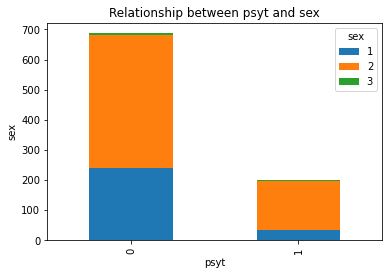

In [16]:
# Plotting relationships between psyt and sex
var1 = "psyt"
var2 = "sex"

# Create a cross-tabulation table
ctab = pd.crosstab(df[var1], df[var2])

# Plot the cross-tabulation table
ctab.plot(kind='bar', stacked=True)
plt.title("Relationship between " + var1 + " and " + var2)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

Let's see what sex visited the most a psychotherapist in the last year.

In [17]:
# Create the new data frame
df_psyt = pd.DataFrame(data={'psyt': df_cat['psyt'], 'sex': df_cat['sex']})

# Group the data by psychotherapy and sex
df_psyt = df_psyt.groupby(['psyt', 'sex']).size().reset_index(name='count')

# Calculate the percentage of male, female, and non binary in each health category
total = df_psyt['count'].sum()
df_psyt['percentage'] = df_psyt['count'] / total * 100
df_psyt['sex'] = df_psyt['sex'].map({1: 'Male', 2: 'Female', 3: 'Non Binary'})

In [18]:
df_psyt

,psyt,sex,count,percentage
0,0,Male,241,27.200903
1,0,Female,442,49.887133
2,0,Non Binary,4,0.451467
3,1,Male,34,3.837472
4,1,Female,164,18.510158
5,1,Non Binary,1,0.112867


We can see that females tend to visit psychoterapists more than males and non binary people.

We print the percentage for every pair of variables in chi2_table

In [19]:
# Do it for every pair of variables in chi2_table
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(var1 + " and " + var2)
    df_temp = pd.DataFrame(data={var1: df_cat[var1], var2: df_cat[var2]})
    df_temp = df_temp.groupby([var1, var2]).size().reset_index(name='count')
    total = df_temp['count'].sum()
    df_temp['percentage'] = df_temp['count'] / total * 100
    df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
    print(df_temp)
    print('-----------------')

year and stud_h
     year  stud_h  count  percentage
0       1       0      1    0.112867
1       1       4      1    0.112867
2       1       5      1    0.112867
3       1       6      6    0.677201
4       1       7      8    0.902935
..    ...     ...    ...         ...
217     6      35      1    0.112867
218     6      36      2    0.225734
219     6      40      3    0.338600
220     6      45      1    0.112867
221     6      50      1    0.112867

[222 rows x 4 columns]
-----------------
year and job
    year  job  count  percentage
0      1    0    198   22.347630
1      1    1     47    5.304740
2      2    0    105   11.851016
3      2    1     30    3.386005
4      3    0     82    9.255079
5      3    1     61    6.884876
6      4    0     57    6.433409
7      4    1     66    7.449210
8      5    0     63    7.110609
9      5    1     64    7.223476
10     6    0     72    8.126411
11     6    1     41    4.627540
-----------------
sex and psyt
   sex  psyt  count  perc

## Continuous data - Numerical variables

### Descriptive Statistics

In [20]:
df_num.head(10)

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,88,62,27,17,0.738095,34,61,17,13,20
1,26,109,55,37,22,0.690476,7,33,14,11,26
2,21,106,64,39,17,0.690476,25,73,24,7,23
3,21,101,52,33,18,0.833333,17,48,16,10,21
4,21,102,58,28,21,0.690476,14,46,22,14,23
5,26,102,48,37,17,0.690476,14,56,18,15,18
6,23,117,58,38,23,0.714286,45,56,28,17,16
7,23,118,65,40,32,0.880952,6,36,11,10,27
8,23,118,69,46,23,0.666667,43,43,26,21,22
9,22,108,56,36,22,0.690476,11,43,18,6,23


Distribution of numerical variables

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

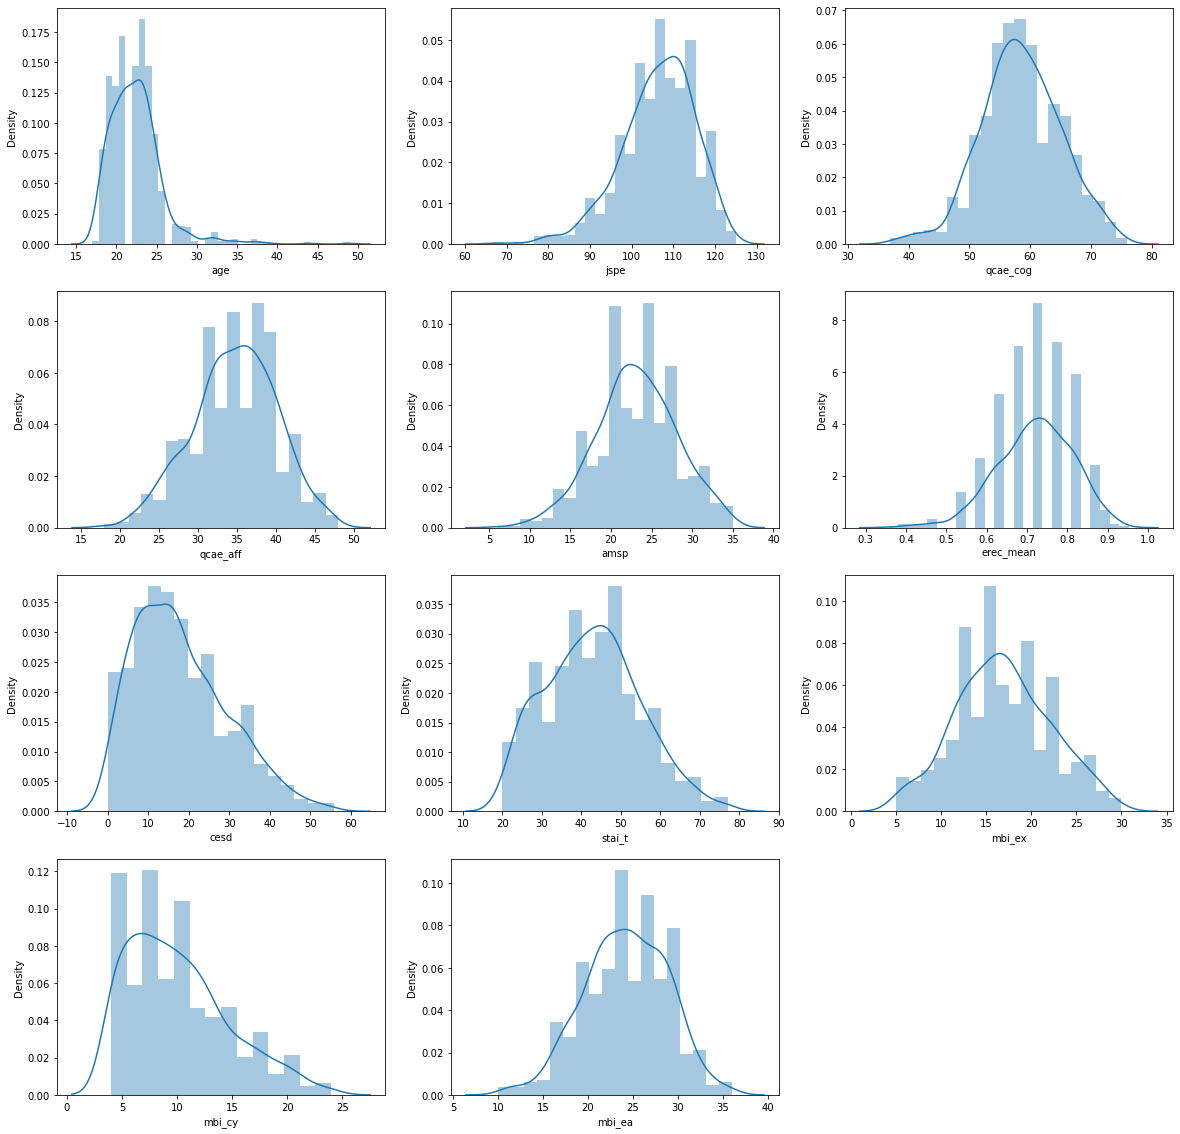

In [21]:
# Plotting the distribution of each numerical variable using Seaborn
# Set the figure size
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)
    sns.distplot(df_num[col])
    plt.xlabel(col)
    plt.ylabel('Density')

plt.show()

### Correlation matrix and heatmap

In [22]:
# Correlation matrix using Pearson's correlation coefficient (r) and p-value (p) to determine the statistical significance
corr_matrix = df_num.corr(method='pearson')
corr_matrix

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
age,1.000000,0.223221,0.059355,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
jspe,0.223221,1.000000,0.342668,0.263384,0.099395,0.097062,-0.080058,-0.075036,-0.040542,-0.006981,0.082508
qcae_cog,0.059355,0.342668,1.000000,0.258696,0.386682,0.073708,-0.034244,-0.077868,-0.023630,-0.024820,0.184096
qcae_aff,-0.008130,0.263384,0.258696,1.000000,-0.071391,0.141379,0.250947,0.331350,0.215886,0.128488,-0.113891
amsp,0.000477,0.099395,0.386682,-0.071391,1.000000,0.002780,-0.152052,-0.249231,-0.073011,-0.029343,0.220616
erec_mean,-0.018699,0.097062,0.073708,0.141379,0.002780,1.000000,0.029881,0.037688,0.015348,0.061965,-0.034889
cesd,-0.139106,-0.080058,-0.034244,0.250947,-0.152052,0.029881,1.000000,0.715728,0.605617,0.407727,-0.453589
stai_t,-0.081893,-0.075036,-0.077868,0.331350,-0.249231,0.037688,0.715728,1.000000,0.530486,0.331884,-0.462535
mbi_ex,-0.182733,-0.040542,-0.023630,0.215886,-0.073011,0.015348,0.605617,0.530486,1.000000,0.505200,-0.480821
mbi_cy,-0.001853,-0.006981,-0.024820,0.128488,-0.029343,0.061965,0.407727,0.331884,0.505200,1.000000,-0.565939


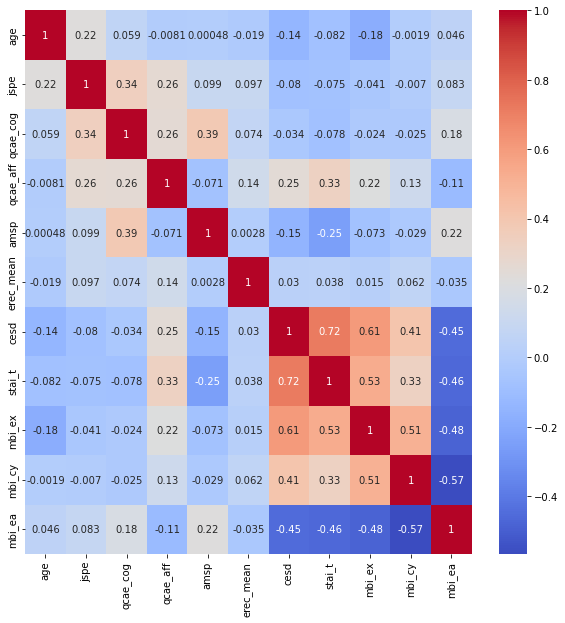

In [23]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# Get a dataframe of the most to least correlated variables
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_matrix = corr_matrix[corr_matrix['Variable 1'] != corr_matrix['Variable 2']]
corr_matrix = corr_matrix.sort_values(by='Correlation', ascending=False)
corr_matrix

,Variable 1,Variable 2,Correlation
73,cesd,stai_t,0.715728
83,stai_t,cesd,0.715728
74,cesd,mbi_ex,0.605617
94,mbi_ex,cesd,0.605617
85,stai_t,mbi_ex,0.530486
...,...,...,...
117,mbi_ea,stai_t,-0.462535
118,mbi_ea,mbi_ex,-0.480821
98,mbi_ex,mbi_ea,-0.480821
109,mbi_cy,mbi_ea,-0.565939


### Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that is used to reduce the number of variables in a dataset while retaining as much information as possible. It is used to reduce the number of variables in a dataset by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [25]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# Standardize the data
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)

# Fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_num_scaled)

# Print the shape of pca_features
print("The shape of the pca is : ", pca_features.shape)

The shape of the pca is :  (886, 10)


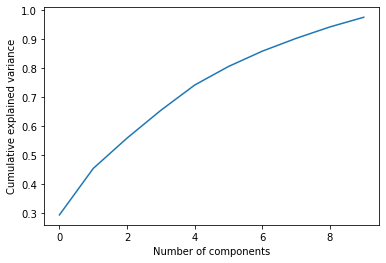

In [27]:
# Plot the cumulative sum of the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Interpretation:
1. The explained variance tells you how much information (variance) can be attributed to each of the principal components.
2. The cumulative explained variance tells you how much information (variance) can be attributed to the principal components.

#### Loadings of the principal components

Loadings are the coefficients that describe how each variable contributes to the principal components. The loadings are the weights that are assigned to each variable in a principal component.
The higher the absolute value of the loading, the more important the variable is in that principal component. The loadings can be positive or negative, depending on the direction of the correlation between the variable and the principal component.

In [28]:
# Create a dataframe of the loadings of the first four principal components and the variable names (columns) of the original dataset (index)
loadings = pd.DataFrame({'Feature': df_num.columns, 'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 'PC4': pca.components_[3]})
loadings

# Sort the loadings of each principal component by their absolute value in descending order and print the first 5 rows
loadings = loadings.sort_values(by=['PC1', 'PC2', 'PC3', 'PC4'], ascending=False)
loadings.head(20)

,Feature,PC1,PC2,PC3,PC4
6,cesd,0.458541,-0.046279,-0.085557,-0.076355
7,stai_t,0.449099,-0.033290,0.080979,-0.162486
8,mbi_ex,0.439070,-0.064837,-0.208321,0.077397
9,mbi_cy,0.370709,-0.072630,-0.078645,0.432332
3,qcae_aff,0.194772,-0.433048,0.202812,-0.379505
5,erec_mean,0.041116,-0.206945,0.142923,-0.408599
1,jspe,-0.061134,-0.524935,0.311785,0.100690
2,qcae_cog,-0.082262,-0.586499,-0.266619,0.016397
0,age,-0.099325,-0.166581,0.578004,0.545685
4,amsp,-0.164774,-0.320225,-0.605181,0.284402


The most significant original variables for each PC can be identified by looking at the magnitude of their loadings, or the weights assigned to each variable in the construction of each PC.

* For the first PC, the variables with the highest absolute loadings are "cesd", "stai_t", and "mbi_ex".

* For the second PC, the variable with the highest absolute loading is "qcae_cog".

* For the third PC, the variable with the highest absolute loading is "amsp".

* For the fourth PC, the variable with the highest absolute loading is "age".

These are the most significant original variables for each PC, and they are the ones that contribute the most to explaining the variance in the data set.

### Clustering

Clustering is the process of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

In [29]:
# Imports
from sklearn.cluster import KMeans

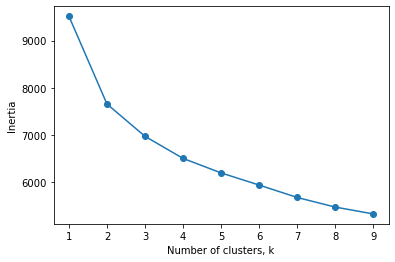

In [30]:
# How can I determine the optimal number of clusters?
# Create a list of inertia values for different k values
inertia = []
for k in range(1, 10):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(pca_features)

    # Append the inertia to the list of inertias
    inertia.append(model.inertia_)

# Plot ks vs inertias
plt.plot(range(1, 10), inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.show()


The point where the inertia begins to decrease more slowly is a good choice for the number of clusters. We choose n=3 clusters.

In [31]:
# Create a KMeans instance with 3 clusters: model (k=3) and fit it to the data (pca_features) using the fit() method
model = KMeans(n_clusters=3)
clusters = model.fit_predict(pca_features)

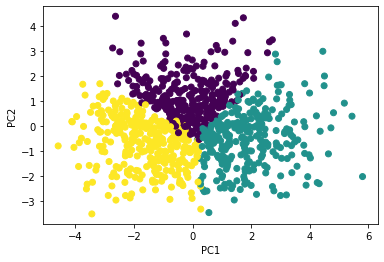

In [32]:
# Create a scatter plot of the first two principal components
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [33]:
# Extracting the cluster labels
cluster_labels = model.labels_

In [34]:
# Adding the cluster labels to the original data frame
df_clustered = df_num.copy() # Create a copy of the original data frame
df_clustered['Cluster'] = cluster_labels # Add the cluster labels to the copy of the original data frame

In [35]:
df_clustered.head(5) # Print the first 5 rows of the data frame

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Cluster
0,18,88,62,27,17,0.738095,34,61,17,13,20,0
1,26,109,55,37,22,0.690476,7,33,14,11,26,2
2,21,106,64,39,17,0.690476,25,73,24,7,23,1
3,21,101,52,33,18,0.833333,17,48,16,10,21,0
4,21,102,58,28,21,0.690476,14,46,22,14,23,0


In [36]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age        jspe   qcae_cog   qcae_aff       amsp  erec_mean  \
Cluster                                                                      
0        21.493243   99.888514  54.084459  32.466216  21.459459   0.692326   
1        22.220641  108.060498  59.533808  37.444840  22.352313   0.737756   
2        23.385113  111.055016  61.864078  34.585761  25.495146   0.730775   

              cesd     stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                         
0        15.841216  42.081081  16.013514   9.209459  24.006757  
1        29.056940  53.099644  21.672598  13.629893  20.750890  
2        10.158576  34.404531  13.346278   7.682848  27.543689  


In [37]:
# Getting the number of patients in each cluster
cluster_grouped.size()

Cluster
0    296
1    281
2    309
dtype: int64

There are 3 clusters, the Cluster 0 has 296 patients, the Cluster 1 has 281 patients, and the Cluster 2 has 309 patients.

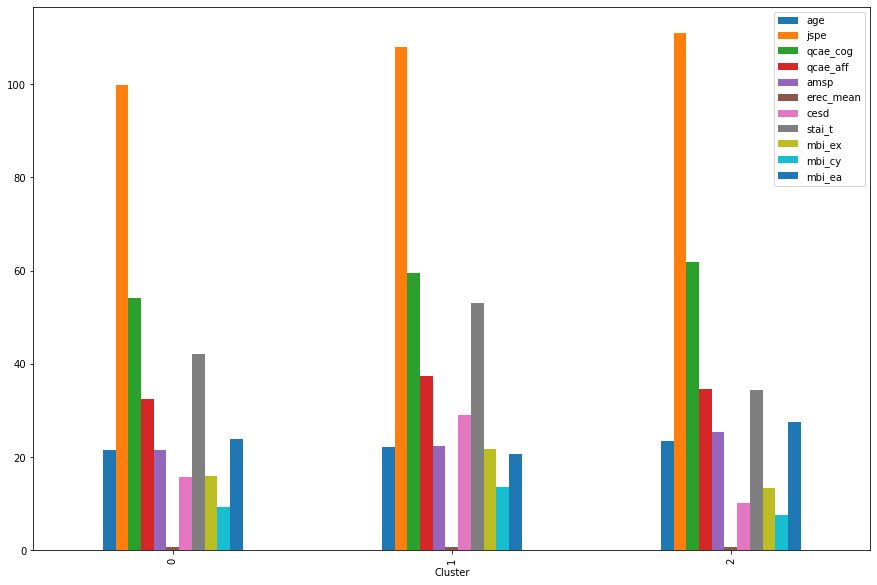

In [38]:
# Plotting the properties of each cluster
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Interpreting the clusters (properties of each cluster)

Cluster 0 is the cluster with the lowest values of the variables.
The patients in this cluster are the ones with the lowest levels of depression, anxiety, and stress.

Cluster 1 is the cluster with the highest values of the variables.
The patients in this cluster are the ones with the highest levels of depression, anxiety, and stress.

Cluster 2 is the cluster with the intermediate values of the variables.
The patients in this cluster are the ones with the intermediate levels of depression, anxiety, and stress.

### Machine Learning

We will use the cluster labels as the target variable and the principal components as the features to train a logistic regression model.

In [39]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42) # 80% training and 20% test data sets

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9887640449438202


#### Model Evaluation

In [41]:
# Import the necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59  1  0]
 [ 1 55  0]
 [ 0  0 62]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        56
           2       1.00      1.00      1.00        62

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



In the confusion matrix, the rows represent the actual cluster labels, and the columns represent the predicted cluster labels.
T

* Precision is the ability of the classifier not to label as positive a sample that is negative.
* Recall is the ability of the classifier to find all the positive samples.
* f1-score is the weighted average of the precision and recall.
* Support is the number of occurrences of each class in y_test.

### Conclusion

In this project:
 *  For categorical variables, we used the chi-square test to determine the association between the variables.
 * For continuous variables, we used the Pearson correlation coefficient to determine the association between the variables. Then, we used the PCA to reduce the dimensionality of the data set, and we used the K-means clustering algorithm to cluster the patients into 3 groups based on their levels of depression, anxiety, and stress. We also used the logistic regression model to predict the cluster labels of the patients based on the principal components. The accuracy of the model is 0.99, which means that the model is able to predict the cluster labels of the patients with 94% accuracy.

### References

https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

https://zenodo.org/record/5702895#.Y8OraNJBwUE
